In [2]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
#Reading dataset 
data=pd.read_csv(r"C:\Users\neema\OneDrive\Desktop\Neema\Essex Class\dissertation\Neema Final\Neema Final\competitor_influencer_similarity.csv", low_memory=False)

In [4]:
data

,competitor_name,influencer_name,similarity_score
0,bulk,aaroncgshore,0.052173
1,bulk,adamcollard,0.112365
2,bulk,aliceliveing,0.105055
3,bulk,brown.elle,0.031806
4,bulk,charlottedawsy,0.096758
...,...,...,...
295,puresport,slimmingworld,0.168555
296,puresport,sylvijaa,0.045350
297,puresport,thebodycoach,0.110334
298,puresport,thefitnesschef_,0.122526


In [5]:
data_1=data[data['influencer_name'].str.contains('liveinnermost')]
data_1

,competitor_name,influencer_name,similarity_score
240,liveinnermost,aaroncgshore,0.047144
241,liveinnermost,adamcollard,0.096969
242,liveinnermost,aliceliveing,0.096684
243,liveinnermost,brown.elle,0.038166
244,liveinnermost,charlottedawsy,0.095584
245,liveinnermost,chessieking,0.093705
246,liveinnermost,chloe.khan,0.059371
247,liveinnermost,courtneydblack,0.092656
248,liveinnermost,danosborneofficial,0.069907
249,liveinnermost,gabbydawnallen,0.092954


In [6]:
x = data_1.iloc[:, [2]]

In [7]:
x  = np.array(x)

In [8]:
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
     }

In [9]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x)
    score = silhouette_score(x, kmeans.labels_)
    silhouette_coefficients.append(score)

In [10]:
#K-means clustering
kmeans_model = KMeans(n_clusters=3,  random_state=32932)
# Fit into our dataset fit
kmeans_predict = kmeans_model.fit_predict(x)

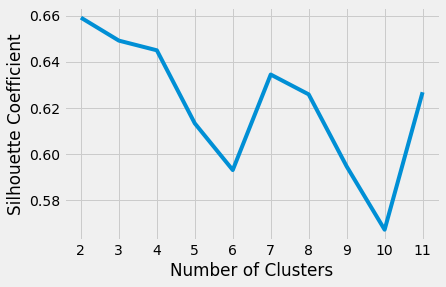

In [11]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 12), silhouette_coefficients)
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [12]:
#Forming the cluster column
data_1['Cluster'] = kmeans_predict

C:\Users\neema\AppData\Local\Temp/ipykernel_54576/3082561771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['Cluster'] = kmeans_predict


In [13]:
data_1.sort_values(
    by="Cluster",
    ascending=True
    )

,competitor_name,influencer_name,similarity_score,Cluster
240,liveinnermost,aaroncgshore,0.047144,0
266,liveinnermost,sylvijaa,0.060294,0
261,liveinnermost,mattdoesfitness,0.066022,0
260,liveinnermost,mac_griffiths_,0.060599,0
258,liveinnermost,korisampson,0.054625,0
256,liveinnermost,jesswright77,0.061343,0
255,liveinnermost,jessica_rose_uk,0.046908,0
253,liveinnermost,jamessmithpt,0.056105,0
252,liveinnermost,jamesgshore,0.058807,0
250,liveinnermost,ini.helen,0.033148,0


In [22]:
data_1['Cluster'].value_counts()

0    15
1    14
2     1
Name: Cluster, dtype: int64

In [18]:
print(data_1.head(20))

    competitor_name     influencer_name  similarity_score  Cluster
240   liveinnermost        aaroncgshore          0.047144        0
241   liveinnermost         adamcollard          0.096969        1
242   liveinnermost        aliceliveing          0.096684        1
243   liveinnermost          brown.elle          0.038166        0
244   liveinnermost      charlottedawsy          0.095584        1
245   liveinnermost         chessieking          0.093705        1
246   liveinnermost          chloe.khan          0.059371        0
247   liveinnermost      courtneydblack          0.092656        1
248   liveinnermost  danosborneofficial          0.069907        0
249   liveinnermost      gabbydawnallen          0.092954        1
250   liveinnermost           ini.helen          0.033148        0
251   liveinnermost       itsalwayshana          0.073508        1
252   liveinnermost         jamesgshore          0.058807        0
253   liveinnermost        jamessmithpt          0.056105     

In [25]:
x=data_1[(data_1['Cluster']==0)]
x.head(100)

,competitor_name,influencer_name,similarity_score,Cluster
240,liveinnermost,aaroncgshore,0.047144,0
243,liveinnermost,brown.elle,0.038166,0
246,liveinnermost,chloe.khan,0.059371,0
248,liveinnermost,danosborneofficial,0.069907,0
250,liveinnermost,ini.helen,0.033148,0
252,liveinnermost,jamesgshore,0.058807,0
253,liveinnermost,jamessmithpt,0.056105,0
254,liveinnermost,jesshunt2,0.046857,0
255,liveinnermost,jessica_rose_uk,0.046908,0
256,liveinnermost,jesswright77,0.061343,0
